<a href="https://colab.research.google.com/github/kazirafi71/Thesis/blob/master/Updates_resume_dataset_Comparative_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
pip install --upgrade tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional,GRU
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import keras

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.optimizers import SGD

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CV Sorting Project/UpdatedResumeDataSet.csv')
df.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df.groupby('Category').describe()

Resume         \
                           count unique   
Category                                  
Advocate                      20     10   
Arts                          36      6   
Automation Testing            26      7   
Blockchain                    40      5   
Business Analyst              28      6   
Civil Engineer                24      6   
Data Science                  40     10   
Database                      33     11   
DevOps Engineer               55      7   
DotNet Developer              28      7   
ETL Developer                 40      5   
Electrical Engineering        30      5   
HR                            44     10   
Hadoop                        42      7   
Health and fitness            30      6   
Java Developer                84     13   
Mechanical Engineer           40      5   
Network Security Engineer     25      5   
Operations Manager            40      4   
PMO                           30      3   
Python Developer              48      6   
SAP Developer                 24      6   
Sales                         40      5   
Testing                       70      7   
Web Designing                 45      4   

                                                                              \
                                                                         top   
Category                                                                       
Advocate                   TECHNICAL QUALIFICATIONS: â¢ Windows, Ms. Off...   
Arts                       â¢ Good communication skill â¢ Quick learner...   
Automation Testing         SKILLS Agile Methodology Scrum, Kanban, Extrem...   
Blockchain                 Hobbies â¢ Playing Chess â¢ Solving Rubik's ...   
Business Analyst           Key Skills - Requirement Gathering - Requireme...   
Civil Engineer             Education Details \r\n B.E in Civil Engineerin...   
Data Science               Skills * Programming Languages: Python (pandas...   
Database                   TECHNICAL EXPERTISE â¢ DB Languages: SQL â¢ ...   
DevOps Engineer            Skills VISA B1-VISA (USA) Onsite Visits to Swe...   
DotNet Developer           TECHNICAL SKILLS â¢ Web Technologies: ASP .NE...   
ETL Developer              Technical Summary â¢ Knowledge of Informatica...   
Electrical Engineering     Skills: 1) MC Office 2) AutoCAD 2016 3) Introd...   
HR                         Education Details \r\nJune 2012 to May 2015 B....   
Hadoop                     Education Details \r\n\r\nHadoop Developer \r\...   
Health and fitness         Education Details \r\nJanuary 1992 to January ...   
Java Developer             TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...   
Mechanical Engineer        Education Details \r\nMay 1999 to September 20...   
Network Security Engineer  Skill Set â¢ Experience in Implementing, and ...   
Operations Manager         Education Details \r\n BCA   Vinayaka Missions...   
PMO                        CORE COMPETENCIES â¢ Maintain processes to en...   
Python Developer           Technical Skills / Responsibilities: â¢ Hands...   
SAP Developer              Skills: â¢ ETL â¢ Data Warehousing â¢ SQL/P...   
Sales                      Education Details \r\n Bachelor's   \r\n Bache...   
Testing                    â¢ Good logical and analytical skills â¢ Pos...   
Web Designing              Technical Skills Web Technologies: Angular JS,...   

                                
                          freq  
Category                        
Advocate                     2  
Arts                         6  
Automation Testing           8  
Blockchain                   8  
Business Analyst             6  
Civil Engineer               4  
Data Science                 4  
Database                     3  
DevOps Engineer             17  
DotNet Developer             4  
ETL Developer                8  
Electrical Engineering       6  
HR                           8  
Hadoop                       6  
Health and fitness 

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
# calculating length of each record in our df
df['length'] = df['Category'].apply(lambda x: len(x))
df.head()

,Category,Resume,length
0,Data Science,Skills * Programming Languages: Python (pandas...,12
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,12
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",12
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",12


In [ ]:
# remove the URLs, hashtags, mentions, special letters, and punctuations

import re

def clean(text):
    
    
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

df['clean text']=df.Resume.apply(lambda x: clean(x))

In [ ]:
# df['Resume'] = df['Resume'].apply(lambda x: convert_to_lower(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_numbers(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_punctuation(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_stopwords(x))
# df['Resume'] = df['Resume'].apply(lambda x: remove_extra_white_spaces(x))
# df['Resume'] = df['Resume'].apply(lambda x: lemmatizing(x))

In [ ]:
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

In [ ]:
df['clean text'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

In [ ]:

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords=set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences=df['Resume'].values
cleanSentences =""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)
            
word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

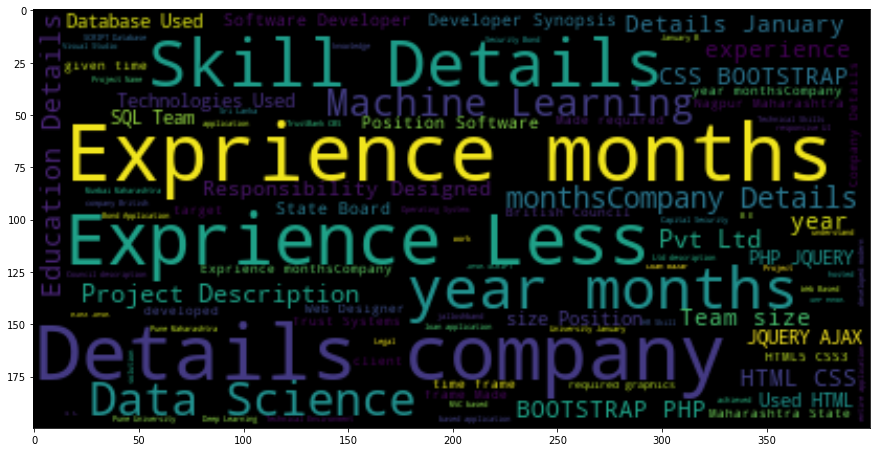

In [ ]:
WC=WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC, interpolation='bilinear')

In [ ]:
#Training Machine Learning Model

from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    df[i]=le.fit_transform(df[i])

df.head(10)

,Category,Resume,length,clean text
0,6,Skills * Programming Languages: Python (pandas...,12,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,12,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",12,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,12,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",12,Education Details MCA YMCAUST Faridabad Haryan...
5,6,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",12,SKILLS C Basics IOT Python MATLAB Data Science...
6,6,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,12,Skills Python Tableau Data Visuali...
7,6,Education Details \r\n B.Tech Rayat and Bahr...,12,Education Details B Tech Rayat and Bahra Insti...
8,6,Personal Skills â¢ Ability to quickly grasp t...,12,Personal Skills Ability to quickly grasp t...
9,6,Expertise â Data and Quantitative Analysis â...,12,Expertise Data and Quantitative Analysis ...


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

text=df['clean text'].values
terget=df['Category'].values



vect=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=250)

vect.fit(text)

Word_feature=vect.transform(text)

Word_feature.shape

(962, 250)

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['clean text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7601 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['clean text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of df tensor:', X.shape)

Shape of df tensor: (962, 250)


In [ ]:
Y = pd.get_dummies(df['Category']).values
print('Shape of Category tensor:', Y.shape)

Shape of Category tensor: (962, 25)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30,random_state=42)
print(Y_train)
print(X_test.shape,Y_test.shape)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
(289, 250) (289, 25)


In [ ]:
# LSTM model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.5))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 dropout (Dropout)           (None, 250, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 5,120,473
Trainable params: 5,120,473
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 30
my_callbacks = [
     tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)


Epoch 1/20
21/21 [==============================] - 25s 1s/step - loss: 3.2021 - accuracy: 0.0909 - val_loss: 3.1848 - val_accuracy: 0.1176
Epoch 2/20
21/21 [==============================] - 20s 940ms/step - loss: 3.0803 - accuracy: 0.1686 - val_loss: 3.0695 - val_accuracy: 0.1176
Epoch 3/20
21/21 [==============================] - 11s 500ms/step - loss: 2.8406 - accuracy: 0.2066 - val_loss: 2.9163 - val_accuracy: 0.1471
Epoch 4/20
21/21 [==============================] - 10s 473ms/step - loss: 2.8492 - accuracy: 0.2612 - val_loss: 2.8086 - val_accuracy: 0.2941
Epoch 5/20
21/21 [==============================] - 10s 475ms/step - loss: 2.4022 - accuracy: 0.3967 - val_loss: 2.4040 - val_accuracy: 0.3088
Epoch 6/20
21/21 [==============================] - 10s 483ms/step - loss: 1.9494 - accuracy: 0.4661 - val_loss: 2.1115 - val_accuracy: 0.4265
Epoch 7/20
21/21 [==============================] - 10s 471ms/step - loss: 1.6926 - accuracy: 0.5388 - val_loss: 1.7745 - val_accuracy: 0.6176
Ep

In [ ]:

# BiLSTM model


model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 dropout_1 (Dropout)         (None, 250, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 25)                6425      
                                                                 
Total params: 5,240,921
Trainable params: 5,240,921
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 24s 878ms/step - loss: 3.1868 - accuracy: 0.1355 - val_loss: 3.1403 - val_accuracy: 0.1618
Epoch 2/20
21/21 [==============================] - 17s 833ms/step - loss: 3.0260 - accuracy: 0.1174 - val_loss: 3.0368 - val_accuracy: 0.1618
Epoch 3/20
21/21 [==============================] - 17s 823ms/step - loss: 2.7752 - accuracy: 0.2198 - val_loss: 2.8070 - val_accuracy: 0.2500
Epoch 4/20
21/21 [==============================] - 20s 939ms/step - loss: 2.4079 - accuracy: 0.4033 - val_loss: 2.3770 - val_accuracy: 0.4853
Epoch 5/20
21/21 [==============================] - 17s 830ms/step - loss: 1.8663 - accuracy: 0.5769 - val_loss: 1.9818 - val_accuracy: 0.4559
Epoch 6/20
21/21 [==============================] - 20s 955ms/step - loss: 1.4991 - accuracy: 0.6678 - val_loss: 1.6072 - val_accuracy: 0.6029
Epoch 7/20
21/21 [==============================] - 18s 841ms/step - loss: 1.1537 - accuracy: 0.7124 - val_loss: 1.3788 - val_accuracy: 0.6765

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs

#training params
batch_size = 256 
num_epochs = 8 

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

In [ ]:
#CNN architecture
print("training CNN ...")
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(25, activation='softmax'))


opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

training CNN ...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 conv1d (Conv1D)             (None, 250, 64)           44864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 125, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 125, 64)           28736     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 6

In [ ]:


epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 4s 165ms/step - loss: 3.1739 - accuracy: 0.1306 - val_loss: 3.1101 - val_accuracy: 0.2500
Epoch 2/20
21/21 [==============================] - 3s 151ms/step - loss: 2.9972 - accuracy: 0.1934 - val_loss: 2.9475 - val_accuracy: 0.2500
Epoch 3/20
21/21 [==============================] - 3s 156ms/step - loss: 2.7512 - accuracy: 0.2496 - val_loss: 2.6652 - val_accuracy: 0.3676
Epoch 4/20
21/21 [==============================] - 3s 150ms/step - loss: 2.3544 - accuracy: 0.4050 - val_loss: 2.2747 - val_accuracy: 0.4412
Epoch 5/20
21/21 [==============================] - 3s 156ms/step - loss: 1.9268 - accuracy: 0.5421 - val_loss: 1.7492 - val_accuracy: 0.7794
Epoch 6/20
21/21 [==============================] - 3s 153ms/step - loss: 1.4678 - accuracy: 0.7058 - val_loss: 1.2130 - val_accuracy: 0.8824
Epoch 7/20
21/21 [==============================] - 3s 153ms/step - loss: 1.0398 - accuracy: 0.8066 - val_loss: 0.8070 - val_accuracy: 0.8971
Epoch 

In [ ]:
# GRU model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(GRU(128, dropout=0.5))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 dropout_3 (Dropout)         (None, 250, 100)          0         
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dense_4 (Dense)             (None, 25)                3225      
                                                                 
Total params: 5,091,545
Trainable params: 5,091,545
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 13s 446ms/step - loss: 3.1984 - accuracy: 0.1157 - val_loss: 3.1826 - val_accuracy: 0.1471
Epoch 2/20
21/21 [==============================] - 8s 380ms/step - loss: 3.1175 - accuracy: 0.1934 - val_loss: 3.1437 - val_accuracy: 0.0882
Epoch 3/20
21/21 [==============================] - 8s 381ms/step - loss: 2.9832 - accuracy: 0.1455 - val_loss: 3.0114 - val_accuracy: 0.2206
Epoch 4/20
21/21 [==============================] - 8s 383ms/step - loss: 2.8145 - accuracy: 0.4760 - val_loss: 2.7861 - val_accuracy: 0.2941
Epoch 5/20
21/21 [==============================] - 8s 378ms/step - loss: 2.3217 - accuracy: 0.4165 - val_loss: 2.2448 - val_accuracy: 0.3529
Epoch 6/20
21/21 [==============================] - 8s 384ms/step - loss: 1.7451 - accuracy: 0.6083 - val_loss: 1.7637 - val_accuracy: 0.5294
Epoch 7/20
21/21 [==============================] - 17s 806ms/step - loss: 1.3305 - accuracy: 0.6992 - val_loss: 1.4235 - val_accuracy: 0.6471
Epoc

In [ ]:
# BiGRU model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(128, dropout=0.5)))
model.add(Dense(25, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# print(model.summary())


epochs = 20
batch_size = 30
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                   callbacks=my_callbacks)

Epoch 1/20
21/21 [==============================] - 19s 669ms/step - loss: 3.1814 - accuracy: 0.0942 - val_loss: 3.1422 - val_accuracy: 0.1176
Epoch 2/20
21/21 [==============================] - 13s 621ms/step - loss: 3.0025 - accuracy: 0.2198 - val_loss: 3.0263 - val_accuracy: 0.1618
Epoch 3/20
21/21 [==============================] - 13s 626ms/step - loss: 2.7465 - accuracy: 0.2413 - val_loss: 2.7635 - val_accuracy: 0.1912
Epoch 4/20
21/21 [==============================] - 13s 642ms/step - loss: 2.3824 - accuracy: 0.4298 - val_loss: 2.4218 - val_accuracy: 0.3235
Epoch 5/20
21/21 [==============================] - 13s 641ms/step - loss: 1.9122 - accuracy: 0.5388 - val_loss: 2.1228 - val_accuracy: 0.4559
Epoch 6/20
21/21 [==============================] - 14s 645ms/step - loss: 1.4332 - accuracy: 0.6843 - val_loss: 1.5495 - val_accuracy: 0.6324
Epoch 7/20
21/21 [==============================] - 14s 680ms/step - loss: 0.9459 - accuracy: 0.7603 - val_loss: 1.1564 - val_accuracy: 0.6765